In [6]:
import os.path as osp
from collections import Counter
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

sns.set_theme(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(17, 9)})

In [7]:
DATA_PATH = osp.join('data/data_kion')

users_df = pd.read_csv(osp.join(DATA_PATH, 'users.csv'))
items_df = pd.read_csv(osp.join(DATA_PATH, 'items.csv'))
interactions_df = pd.read_csv(osp.join(DATA_PATH, 'interactions_df.csv'), parse_dates=['last_watch_dt'])

# EDA

## Users

In [8]:
users_df.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


In [9]:
users_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB


In [10]:
users_df.nunique()

user_id     840197
age              6
income           6
sex              2
kids_flg         2
dtype: int64

### Preprocess

#### Age

In [11]:
users_df['age'] = users_df['age'].fillna('age_unknown')

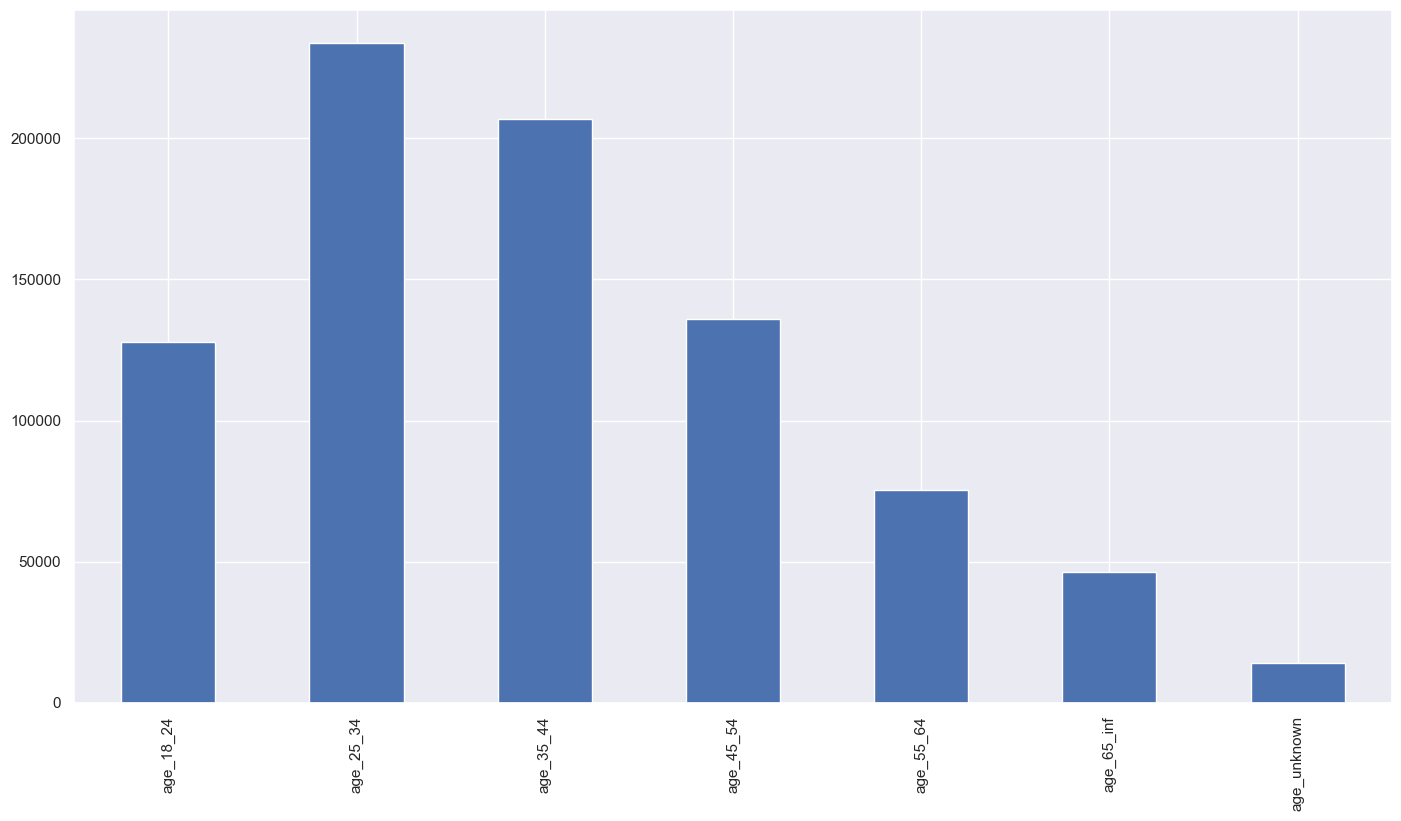

In [12]:
sorted_age_categories = sorted(users_df['age'].unique(), key=lambda s: float(s.split('_')[1] if len(s.split('_')) == 3 else np.inf))
pd.Categorical(users_df['age'], categories=sorted_age_categories, ordered=True).value_counts().sort_index().plot(kind='bar');

In [13]:
users_df['age'].value_counts()

age
age_25_34      233926
age_35_44      207043
age_45_54      135925
age_18_24      127672
age_55_64       75265
age_65_inf      46271
age_unknown     14095
Name: count, dtype: int64

In [14]:
users_df['age'] = users_df['age'].astype('category')

#### Income

In [15]:
users_df['income'] = users_df['income'].fillna('income_unknown')

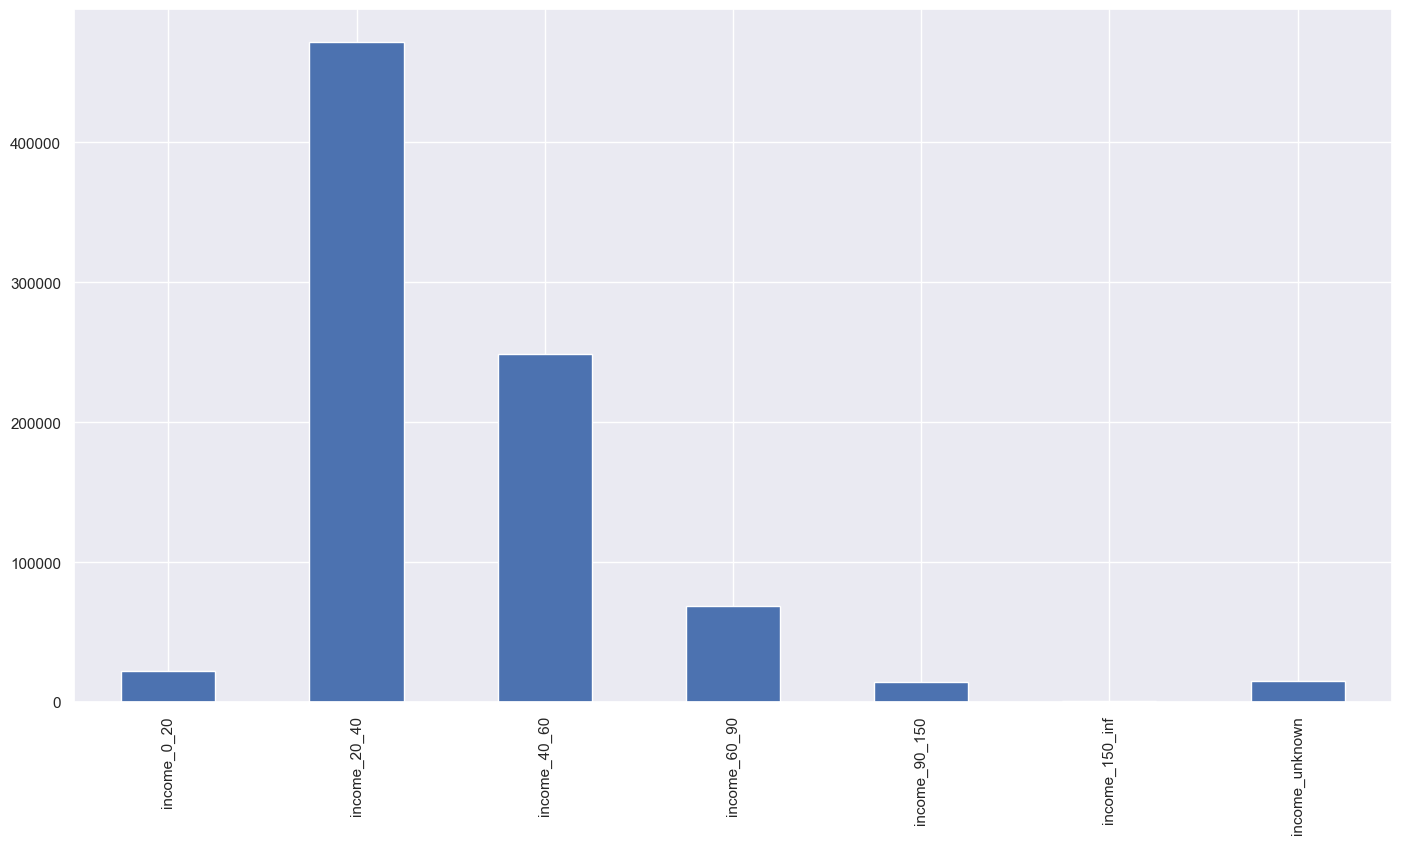

In [16]:
sorted_income_categories = sorted(users_df['income'].unique(), key=lambda s: float(s.split('_')[1] if len(s.split('_')) == 3 else np.inf))
pd.Categorical(users_df['income'], categories=sorted_income_categories, ordered=True).value_counts().sort_index().plot(kind='bar');

In [17]:
users_df['income'].value_counts()

income
income_20_40      471519
income_40_60      248330
income_60_90       68674
income_0_20        21836
income_unknown     14776
income_90_150      13985
income_150_inf      1077
Name: count, dtype: int64

In [18]:
users_df['income'] = users_df['income'].astype('category')

#### Sex

In [19]:
users_df['sex'].value_counts()

sex
Ж    425270
М    401096
Name: count, dtype: int64

In [20]:
users_df['sex'] = users_df['sex'].fillna('sex_unknown')

In [21]:
users_df.loc[users_df.sex == 'М', 'sex'] = 'M'
users_df.loc[users_df.sex == 'Ж', 'sex'] = 'F'

In [22]:
users_df['sex'].value_counts()

sex
F              425270
M              401096
sex_unknown     13831
Name: count, dtype: int64

In [23]:
users_df['sex'] = users_df['sex'].astype('category')

#### kids_flg

In [24]:
users_df['kids_flg'].value_counts()

kids_flg
0    587209
1    252988
Name: count, dtype: int64

In [25]:
users_df['kids_flg'] = users_df['kids_flg'].astype('bool')
users_df['kids_flg'].value_counts()

kids_flg
False    587209
True     252988
Name: count, dtype: int64

#### Duplicates check

In [26]:
users_df.duplicated(subset=['user_id'], keep=False).sum()

np.int64(0)

### Result

In [27]:
users_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   user_id   840197 non-null  int64   
 1   age       840197 non-null  category
 2   income    840197 non-null  category
 3   sex       840197 non-null  category
 4   kids_flg  840197 non-null  bool    
dtypes: bool(1), category(3), int64(1)
memory usage: 9.6 MB


## Items

In [28]:
items_df

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15958,6443,series,Полярный круг,Arctic Circle,2018.0,"драмы, триллеры, криминал","Финляндия, Германия",NaN,16.0,NaN,Ханну Салонен,"Иина Куустонен, Максимилиан Брюкнер, Пихла Вии...","Во время погони за браконьерами по лесу, сотру...","убийство, вирус, расследование преступления, н..."
15959,2367,series,Надежда,NaN,2020.0,"драмы, боевики",Россия,0.0,18.0,NaN,Елена Хазанова,"Виктория Исакова, Александр Кузьмин, Алексей М...",Оригинальный киносериал от создателей «Бывших»...,"Надежда, 2020, Россия"
15960,10632,series,Сговор,Hassel,2017.0,"драмы, триллеры, криминал",Россия,0.0,18.0,NaN,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер","Ола Рапас, Алиетт Офейм, Уильма Лиден, Шанти Р...",Криминальная драма по мотивам романов о шведск...,"Сговор, 2017, Россия"
15961,4538,series,Среди камней,Darklands,2019.0,"драмы, спорт, криминал",Россия,0.0,18.0,NaN,"Марк О’Коннор, Конор МакМахон","Дэйн Уайт О’Хара, Томас Кэйн-Бирн, Джудит Родд...",Семнадцатилетний Дэмиен мечтает вырваться за п...,"Среди, камней, 2019, Россия"


In [29]:
items_df.nunique()

item_id         15963
content_type        2
title           15293
title_orig      10575
release_year      105
genres           2771
countries         687
for_kids            2
age_rating          6
studios            38
directors        7973
actors          12996
description     15619
keywords        15492
dtype: int64

In [30]:
items_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


### Preprocess

#### content_type

In [31]:
items_df['content_type'].value_counts()

content_type
film      12002
series     3961
Name: count, dtype: int64

In [32]:
items_df['content_type'] = items_df['content_type'].astype('category')

#### title

In [33]:
items_df['title'].head()

0          Поговори с ней
1             Голые перцы
2        Тактическая сила
3                  45 лет
4    Все решает мгновение
Name: title, dtype: object

In [34]:
items_df.duplicated(subset=['title']).sum()

np.int64(670)

In [35]:
items_df['title'] = items_df['title'].str.lower()

#### title_orig

In [36]:
items_df['title_orig'].head()

0    Hable con ella
1      Search Party
2    Tactical Force
3          45 Years
4               NaN
Name: title_orig, dtype: object

In [37]:
items_df[items_df['title_orig'].isna()]['countries'].value_counts().head()

countries
Россия            2899
СССР               918
Украина            240
США                101
Великобритания      87
Name: count, dtype: int64

In [38]:
items_df[(items_df['title_orig'].isna()) & (items_df['countries'] == 'Россия')]

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
5,854,film,северо-юг,NaN,2015.0,"драмы, русские",Россия,NaN,16.0,NaN,Юрий Грубник,"Алексей Воронин, Алексей Мурашов, Алена Алинин...",Авторский фильм молодого режиссера Юрия Грубни...,"Северо-Юг, 2015, Россия, бандиты, гангстеры, б..."
9,8604,film,третья попытка,NaN,2013.0,"русские, мелодрамы",Россия,NaN,12.0,NaN,Игорь Мужжухин,"Александр Асташенок, Александр Пашков, Андрей ...","Екатерина Рябова, Александр Асташенок и Алекса...","Третья, попытка, 2013, Россия, любовь, измена,..."
11,15056,film,последний шанс,NaN,2018.0,"боевики, русские",Россия,NaN,16.0,NaN,Михаил Погосов,"Александр Носик, Алексей Кравченко, Василий Шл...",Несколько лет назад Андрей Борисов оставил слу...,"Последний, шанс, 2018, Россия, бандиты, гангст..."
19,15261,film,спящая красавица. легенда двух королевств: лед...,NaN,2020.0,"русские, сказки, фильмы-спектакли, мюзиклы, се...",Россия,NaN,0.0,NaN,"Игорь Оршуляк, Татьяна Навка, Юрий Антизерский","Алина Загитова, Маргарита Дробязко, Ондржей Го...","Ледовое шоу-феерия Татьяны Навки, вдохновленно...","Спящая, красавица, Легенда, двух, королевств, ..."
25,7325,film,вдовий пароход,NaN,2010.0,"драмы, русские",Россия,NaN,16.0,NaN,Станислав Митин,"Александр Пашков, Вадим Померанцев, Галина Пет...",Телевизионный фильм Станислава Митина по однои...,"Вдовий, пароход, 2010, Россия"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15948,1830,series,секреты ежедневного фэйсфитнеса,NaN,NaN,фитнес,Россия,NaN,6.0,NaN,NaN,NaN,Ежедневный уход за лицом изменит вашу жизнь. П...,"Секреты, ежедневного, фэйсфитнеса, Россия, спо..."
15949,15986,series,новаторы,NaN,2010.0,"русские, для детей, сериалы, хочу всё знать, р...",Россия,NaN,6.0,NaN,Алексей Штыхин,"Александр Пинегин, Дмитрий Филимонов, Лариса Б...",Отечественный познавательный мультсериал о пут...,"Новаторы, 2010, Россия, друзья, космос, наука,..."
15951,4914,series,таёжник гил,NaN,2014.0,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,Автор проекта работает инженером-таксатором на...,"Таёжник, ГИЛ, 2014, Россия"
15959,2367,series,надежда,NaN,2020.0,"драмы, боевики",Россия,0.0,18.0,NaN,Елена Хазанова,"Виктория Исакова, Александр Кузьмин, Алексей М...",Оригинальный киносериал от создателей «Бывших»...,"Надежда, 2020, Россия"


In [39]:
items_df['title_orig'] = items_df['title_orig'].fillna('None') 

In [40]:
items_df.duplicated(subset=['title_orig']).sum()

np.int64(5387)

In [41]:
items_df.duplicated(subset=['title', 'title_orig']).sum()

np.int64(192)

#### release_year

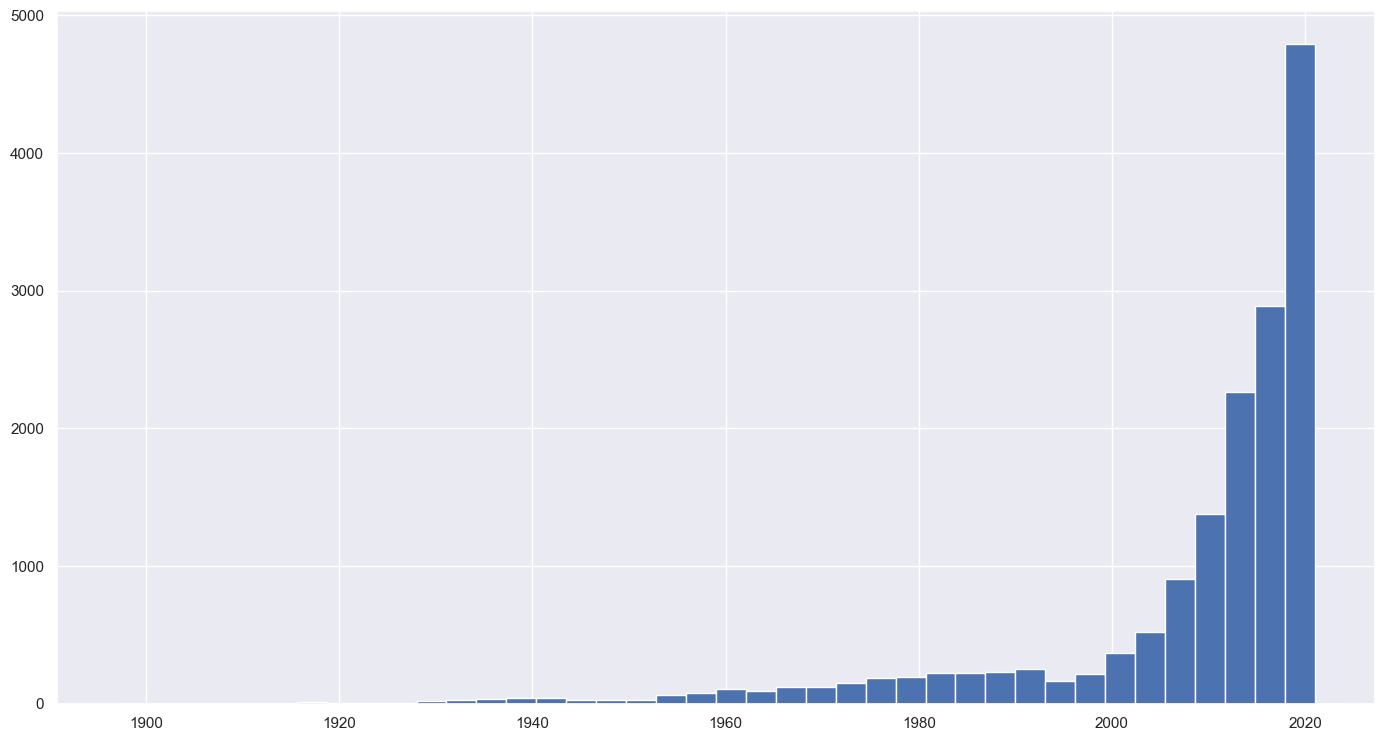

In [42]:
items_df['release_year'].hist(bins=40);

In [43]:
items_df[items_df['release_year'].isna()].head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
89,10950,series,начни дома,None,NaN,фитнес,Россия,NaN,6.0,NaN,NaN,NaN,Приведи себя в хорошую форму дома с минимальны...,"Начни, дома, Россия, спорт-фитнес, спорт-трене..."
294,3901,series,красота лица,None,NaN,фитнес,Россия,NaN,0.0,NaN,NaN,NaN,"Motify научит вас простым, но очень эффективны...","Красота, лица, 2020, Россия, спорт-фитнес, спо..."
374,10656,series,медитации для жизни,None,NaN,фитнес,NaN,NaN,6.0,NaN,NaN,NaN,"В этой программе собраны 3 базовых урока, на к...","Медитации, для, жизни, спорт-фитнес, спорт-тре..."
375,11526,series,психология питания,None,NaN,"фитнес, спорт",NaN,NaN,6.0,NaN,NaN,NaN,В программе от Motify ты узнаешь о психологиче...,"Психология, питания"
572,11532,series,йога старт,None,NaN,фитнес,Россия,NaN,6.0,NaN,NaN,NaN,Программа от Motify подойдет для любого уровня...,"Йога, 2020, Россия, спорт-фитнес, спорт-тренер..."


In [44]:
items_df[items_df['release_year'].isna()][['age_rating', 'genres', 'countries']].value_counts()

age_rating  genres                                                 countries       
6.0         фитнес                                                 Россия              54
0.0         футбол                                                 Россия              22
            фитнес                                                 Россия               5
            зарубежные, детские песни, развитие, для детей         Республика Корея     1
            зарубежные, для детей, западные мультфильмы, развитие  Республика Корея     1
6.0         фитнес                                                 Великобритания       1
Name: count, dtype: int64

Год можно, например, преобразовать к категории следующим способом, если это необходимо

In [45]:
items_df.loc[items_df['release_year'].isna(), 'release_year'] = 2020.

In [46]:
items_df.loc[items_df['release_year'] < 1920, 'release_year_cat'] = 'inf_1920'
items_df.loc[items_df['release_year'] >= 2020, 'release_year_cat'] = '2020_inf'

In [47]:
for i in range (1920, 2020, 10):
    items_df.loc[(items_df['release_year'] >= i) & (items_df['release_year'] < i+10), 'release_year_cat'] = f'{i}_{i+10}'

In [48]:
items_df['release_year_cat'].value_counts()

release_year_cat
2010_2020    8788
2020_inf     2276
2000_2010    2168
1980_1990     745
1990_2000     636
1970_1980     553
1960_1970     342
1950_1960     199
1940_1950     117
1930_1940     104
1920_1930      24
inf_1920       11
Name: count, dtype: int64

In [49]:
items_df = items_df.drop(columns=['release_year'])
items_df['release_year_cat'] = items_df['release_year_cat'].astype('category')

#### genres

In [50]:
items_df['genres'].value_counts()

genres
документальное                                          816
драмы                                                   719
комедии                                                 564
для взрослых                                            482
русские, мелодрамы                                      416
                                                       ... 
драмы, популярное, семейное, приключения                  1
приключения, драмы, зарубежные, военные, фантастика       1
мюзиклы, советские, комедии                               1
биография, русские, короткометражные, документальное      1
зарубежные, семейное, фильмы, про животных                1
Name: count, Length: 2771, dtype: int64

In [51]:
items_df[items_df['genres'] == 'no_genre']

,item_id,content_type,title,title_orig,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,release_year_cat
384,11373,series,ирина аллегрова - караоке,Irina Allegrova - karaoke,no_genre,Россия,NaN,0.0,NaN,NaN,NaN,Караоке песни исполнителя Ирина Аллегрова. Поч...,"Ирина, Аллегрова, -, караоке, 2019, Россия",2010_2020
385,3671,series,google диск. знакомство,Google Disk. Znakomstvo,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,"С помощью Google Диск можно хранить, передават...","Google, Диск, Знакомство, 2020, Россия",2020_inf
479,10271,series,фабрика - караоке,None,no_genre,Россия,NaN,0.0,NaN,NaN,NaN,Караоке песни группы Фабрика. Почувствуйте себ...,"Фабрика, -, караоке, 2020, Россия",2020_inf
525,33,film,встречи с учеными,None,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,В свое время в мире происходит по-настоящему ф...,"Встречи, учеными, 2016, Россия",2010_2020
618,1645,film,глеб архангельский. тайм-менеджмент: как заста...,Gleb Arkhangel′skiy. Taym-menedzhment: kak zas...,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,Российский специалист по тайм-менджменту Глеб ...,"Глеб, Архангельский, Тайм-менеджмент, как, зас...",2020_inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711,4014,series,tags play theme,None,no_genre,Россия,NaN,16.0,NaN,NaN,NaN,Создатель канала по прозвищу Тагс посвящает ко...,"TaGs, Play, Theme, 2010, Россия",2010_2020
15770,4386,series,светлана лобода - караоке,Svetlana Loboda - karaoke,no_genre,Украина,NaN,0.0,NaN,NaN,NaN,Караоке песни исполнителя Светлана Лобода. Поч...,"Светлана, Лобода, -, караоке, 2019, Украина",2010_2020
15790,12364,film,гибкость ног. безопасная подготовка к шпагату....,Gibkost′ nog. Bezopasnaya podgotovka k shpagat...,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,Для поддержания формы и красоты ног можно восп...,"Гибкость, ног, Безопасная, подготовка, к, шпаг...",2020_inf
15834,759,series,amitesh,None,no_genre,Россия,NaN,12.0,NaN,NaN,NaN,Ведущий своего канала делает обзор различных с...,"Amitesh, 2014, Россия",2010_2020


Преобразуем жанры: сгруппируем похожие, удалим все жанры, указывающие на географию фильма (есть отдельная фича), а так же несодержательные жанры и жанры, указывающие на то, фильм это или сериал (есть отдельная фича).

In [52]:
class GenrePreprocessor:
    def __init__(self, genres, frequency_threshold = 0.005):
        self.synonims = (
            ("мультфильмы", "мультфильм", "мультсериалы", "анимация", "русские мультфильмы", "западные мультфильмы"),
            ("мюзиклы", "мюзикл"),
            ("реалити", "реалити-шоу"),
            ("ток-шоу", "токшоу"),
            ("детские", "для самых маленьких", "для детей"),
            ("короткометражные", "короткий метр"),
            ("исторические", "историческое"),
            ("музыка", "музыкальные", "концерт"),
            (("детские", "музыка"), "детские песни"),
            ("для взрослых", "18+"),
            ("познавательные", "образование", "развитие"),
        )
        self.ban = set(["популярное", "фильм", "фильмы", "сериал", "сериалы", "фильмы hbo", "зарубежные", "русские", "советские", "полнометражные", "рекомендуем"])
        self.synonims = {g: genre_group[0] for genre_group in self.synonims for g in genre_group[1:]}

        # calculate genres statistics
        all_genres = [genre for sublist in genres for genre in self._filter_genres(sublist.split(', '))]
        genres_counts = Counter(all_genres)
        self.rare_genres = set([key for key, count in genres_counts.items() if count < frequency_threshold * len(genres)])
        # add rare genres to banned genres
        self.ban |= self.rare_genres
    
        # recalculate
        all_genres = [genre for sublist in genres for genre in self._filter_genres(sublist.split(', '))]
        self.genres_counts = Counter(all_genres)
        self.all_genres = set(all_genres)

        print(f'All genres:')
        pprint(sorted(self.all_genres))
        print(f'Num genres: {len(self.all_genres)}')
        pprint(self.genres_counts)

    def _filter_genres(self, genres: list[str]):
        final_genres = []
        for g in genres:
            g = self.synonims[g] if g in self.synonims.keys() else g
            if not isinstance(g, tuple):
                if g in self.ban:
                    continue
                final_genres.append(g)
            else:
                g = [x for x in g if x not in self.ban]
                final_genres.extend(g)
        return final_genres or ['no_genre']


    def preprocess_genres_str(self, s: str):
        genres = s.split(', ')
        return self._filter_genres(genres)

In [53]:
gp = GenrePreprocessor(items_df['genres'], 0.005)

All genres:
['no_genre',
 'аниме',
 'биография',
 'боевики',
 'военные',
 'детективы',
 'детские',
 'для взрослых',
 'документальное',
 'драмы',
 'исторические',
 'комедии',
 'короткометражные',
 'криминал',
 'мелодрамы',
 'музыка',
 'мультфильмы',
 'мюзиклы',
 'познавательные',
 'приключения',
 'про животных',
 'развлекательные',
 'семейное',
 'спорт',
 'триллеры',
 'ужасы',
 'фантастика',
 'фитнес',
 'фэнтези',
 'хочу всё знать']
Num genres: 30
Counter({'драмы': 5431,
         'комедии': 3858,
         'мелодрамы': 2778,
         'триллеры': 2418,
         'приключения': 1877,
         'боевики': 1820,
         'документальное': 1339,
         'криминал': 1306,
         'детективы': 1224,
         'мультфильмы': 1210,
         'фантастика': 1118,
         'семейное': 1089,
         'ужасы': 1033,
         'фэнтези': 999,
         'детские': 998,
         'военные': 626,
         'исторические': 549,
         'для взрослых': 494,
         'биография': 469,
         'фитнес': 382,
    

In [54]:
items_df['genres'] = items_df['genres'].apply(gp.preprocess_genres_str)

#### countries

In [55]:
items_df['countries'].value_counts()

countries
Россия                                  4237
США                                     4090
СССР                                    1401
Франция                                 1158
Великобритания                           718
                                        ... 
Великобритания, Франция, Австралия         1
США, Германия, Чехия, Великобритания       1
Германия, США, Нидерланды                  1
США, Франция, Канада                       1
США, Германия, Франция, Испания            1
Name: count, Length: 687, dtype: int64

In [56]:
items_df[items_df.countries.isna()].shape

(37, 14)

In [57]:
items_df[items_df.countries.isna()].head()

,item_id,content_type,title,title_orig,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,release_year_cat
374,10656,series,медитации для жизни,None,[фитнес],NaN,NaN,6.0,NaN,NaN,NaN,"В этой программе собраны 3 базовых урока, на к...","Медитации, для, жизни, спорт-фитнес, спорт-тре...",2020_inf
375,11526,series,психология питания,None,"[фитнес, спорт]",NaN,NaN,6.0,NaN,NaN,NaN,В программе от Motify ты узнаешь о психологиче...,"Психология, питания",2020_inf
573,63,series,пробуди силу духа,None,"[фитнес, спорт]",NaN,NaN,6.0,NaN,NaN,NaN,Три коротких и энергичных класса Кундалини йог...,"Пробуди, силу, Духа, 2021, спорт-фитнес, спорт...",2020_inf
750,11551,series,растяжка для кaждого,None,"[фитнес, спорт]",NaN,NaN,6.0,NaN,NaN,NaN,Программа от Motify поможет вам почувствовать ...,"Растяжка, для, кaждого",2020_inf
1960,16014,series,работа с телом для молодости лица,None,"[фитнес, спорт]",NaN,NaN,6.0,NaN,NaN,NaN,Программа от Motify направлена на работу с тел...,"Работа, телом, для, молодости, лица",2020_inf


In [58]:
items_df.loc[items_df.countries.isna(), 'countries'] = 'Россия'

In [59]:
items_df['countries'] = items_df['countries'].str.lower()
items_df['countries'] = items_df['countries'].apply(lambda x: ', '.join(sorted(list(set(x.split(', '))))))

In [60]:
items_df.countries.value_counts().head(10)

countries
россия                 4274
сша                    4090
ссср                   1401
франция                1158
великобритания          718
украина                 340
италия                  256
канада                  233
республика корея        230
великобритания, сша     193
Name: count, dtype: int64

In [61]:
items_df['countries'] = items_df['countries'].astype('category')

#### for_kids

In [62]:
items_df['for_kids'].value_counts()

for_kids
0.0    452
1.0    114
Name: count, dtype: int64

In [63]:
items_df['for_kids'] = items_df['for_kids'].fillna(0)
items_df['for_kids'] = items_df['for_kids'].astype('bool')

In [64]:
items_df['for_kids'].value_counts()

for_kids
False    15849
True       114
Name: count, dtype: int64

#### age_rating

In [65]:
items_df.age_rating.value_counts()

age_rating
16.0    5729
12.0    4147
18.0    2547
6.0     1538
0.0     1518
21.0     482
Name: count, dtype: int64

In [66]:
items_df[items_df.age_rating.isna()]

,item_id,content_type,title,title_orig,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,release_year_cat
8297,6316,series,машины-помощники,None,"[детские, хочу всё знать, мультфильмы, познава...",россия,False,NaN,NaN,NaN,NaN,Маленькие мальчики всего мира любят играть в м...,"Машины-помощники, 2017, Россия, работа, преодо...",2010_2020
12352,14409,series,бибабу,None,"[детские, хочу всё знать, мультфильмы, познава...",россия,False,NaN,NaN,NaN,NaN,В сказочное подводное царство приглашают мален...,"друзья, магия и волшебство, рыбы, моря и океан...",2010_2020


In [67]:
items_df.loc[items_df.age_rating.isna(), 'age_rating'] = 0

In [68]:
items_df['age_rating'] = items_df['age_rating'].astype(int).astype('category')

In [69]:
items_df

,item_id,content_type,title,title_orig,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords,release_year_cat
0,10711,film,поговори с ней,Hable con ella,"[драмы, детективы, мелодрамы]",испания,False,16,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ...",2000_2010
1,2508,film,голые перцы,Search Party,"[приключения, комедии]",сша,False,16,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео...",2010_2020
2,10716,film,тактическая сила,Tactical Force,"[криминал, триллеры, боевики, комедии]",канада,False,16,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг...",2010_2020
3,7868,film,45 лет,45 Years,"[драмы, мелодрамы]",великобритания,False,16,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю...",2010_2020
4,16268,film,все решает мгновение,None,"[драмы, спорт, мелодрамы]",ссср,False,12,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж...",1970_1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15958,6443,series,полярный круг,Arctic Circle,"[драмы, триллеры, криминал]","германия, финляндия",False,16,NaN,Ханну Салонен,"Иина Куустонен, Максимилиан Брюкнер, Пихла Вии...","Во время погони за браконьерами по лесу, сотру...","убийство, вирус, расследование преступления, н...",2010_2020
15959,2367,series,надежда,None,"[драмы, боевики]",россия,False,18,NaN,Елена Хазанова,"Виктория Исакова, Александр Кузьмин, Алексей М...",Оригинальный киносериал от создателей «Бывших»...,"Надежда, 2020, Россия",2020_inf
15960,10632,series,сговор,Hassel,"[драмы, триллеры, криминал]",россия,False,18,NaN,"Эшреф Рейбрук, Амир Камдин, Эрик Эгер","Ола Рапас, Алиетт Офейм, Уильма Лиден, Шанти Р...",Криминальная драма по мотивам романов о шведск...,"Сговор, 2017, Россия",2010_2020
15961,4538,series,среди камней,Darklands,"[драмы, спорт, криминал]",россия,False,18,NaN,"Марк О’Коннор, Конор МакМахон","Дэйн Уайт О’Хара, Томас Кэйн-Бирн, Джудит Родд...",Семнадцатилетний Дэмиен мечтает вырваться за п...,"Среди, камней, 2019, Россия",2010_2020


#### studios

In [70]:
items_df['studios'] = items_df['studios'].fillna('Unknown')

In [71]:
items_df['studios'] = items_df['studios'].str.lower()
items_df['studios'] = items_df['studios'].apply(lambda x: ', '.join(sorted(list(set(x.split(', '))))))

In [72]:
# all_studios = []
# for studio in items_df['studios'].unique():
#     all_studios.extend(studio.split(', '))
# len(all_studios)

In [73]:
items_df['studios'] = items_df['studios'].astype('category')

#### directors

In [74]:
items_df['directors'] = items_df['directors'].fillna('Unknown')

In [75]:
items_df['directors'] = items_df['directors'].str.lower()

In [76]:
items_df['directors'] = items_df['directors'].astype('category')

#### actors

In [77]:
items_df['actors'] = items_df['actors'].fillna('Unknown')

In [78]:
items_df['actors'] = items_df['actors'].astype('category')

#### keywords

In [79]:
items_df['keywords'].head()

0    Поговори, ней, 2002, Испания, друзья, любовь, ...
1    Голые, перцы, 2014, США, друзья, свадьбы, прео...
2    Тактическая, сила, 2011, Канада, бандиты, ганг...
3    45, лет, 2015, Великобритания, брак, жизнь, лю...
4    Все, решает, мгновение, 1978, СССР, сильные, ж...
Name: keywords, dtype: object

Если планируется использовать - можно, например, заполнить пропуски копипастой из других фич

In [80]:
items_df['keywords'] = items_df['keywords'].fillna('Unknown')

In [81]:
items_df['keywords'] = items_df['keywords'].astype('category')

#### description

In [82]:
items_df['description'] = items_df['description'].fillna('-')

#### Duplicates check

In [83]:
items_df.duplicated(subset=['item_id'], keep=False).sum()

np.int64(0)

In [84]:
items_df.duplicated(subset=['title']).sum()

np.int64(687)

In [85]:
items_df[items_df.duplicated(subset=['content_type', 'countries', 'title', 'directors'], keep=False)].sort_values('title')[['content_type', 'title', 'countries', 'for_kids', 'directors']].head()

,content_type,title,countries,for_kids,directors
7333,film,пираты по соседству,нидерланды,False,пим ван хёве
12757,film,пираты по соседству,нидерланды,False,пим ван хёве


In [86]:
items_df.duplicated(subset=['content_type', 'countries', 'title', 'directors'], keep=False).sum()

np.int64(2)

### Result

In [87]:
items_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   item_id           15963 non-null  int64   
 1   content_type      15963 non-null  category
 2   title             15963 non-null  object  
 3   title_orig        15963 non-null  object  
 4   genres            15963 non-null  object  
 5   countries         15963 non-null  category
 6   for_kids          15963 non-null  bool    
 7   age_rating        15963 non-null  category
 8   studios           15963 non-null  category
 9   directors         15963 non-null  category
 10  actors            15963 non-null  category
 11  description       15963 non-null  object  
 12  keywords          15963 non-null  category
 13  release_year_cat  15963 non-null  category
dtypes: bool(1), category(8), int64(1), object(4)
memory usage: 2.4+ MB


## Interactions

In [88]:
interactions_df.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


In [89]:
interactions_df.shape

(5476251, 5)

In [90]:
interactions_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   last_watch_dt  datetime64[ns]
 3   total_dur      int64         
 4   watched_pct    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 208.9 MB


In [91]:
interactions_df.nunique()

user_id          962179
item_id           15706
last_watch_dt       163
total_dur        129788
watched_pct         101
dtype: int64

In [92]:
print(f'Data date range: {interactions_df.last_watch_dt.min().date()} - {interactions_df.last_watch_dt.max().date()}')

Data date range: 2021-03-13 - 2021-08-22


### Preprocessing

#### watched_pct

In [93]:
interactions_df.watched_pct.max()

np.float64(100.0)

In [94]:
interactions_df.watched_pct.min()

np.float64(0.0)

In [95]:
interactions_df['watched_pct'] = interactions_df['watched_pct'].astype(pd.Int8Dtype())

In [96]:
interactions_df['watched_pct'] = interactions_df['watched_pct'].fillna(0)

<Axes: >

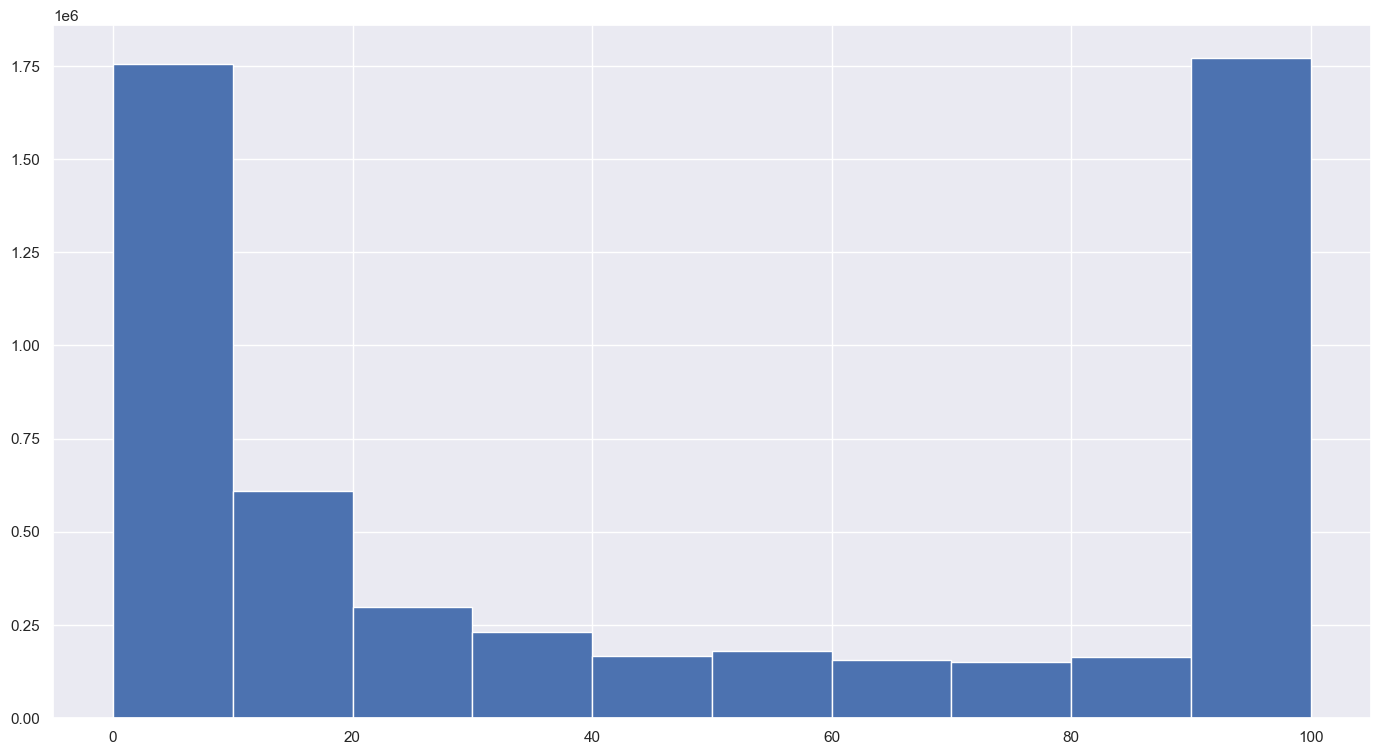

In [97]:
interactions_df['watched_pct'].hist()

#### total_dur

<Axes: >

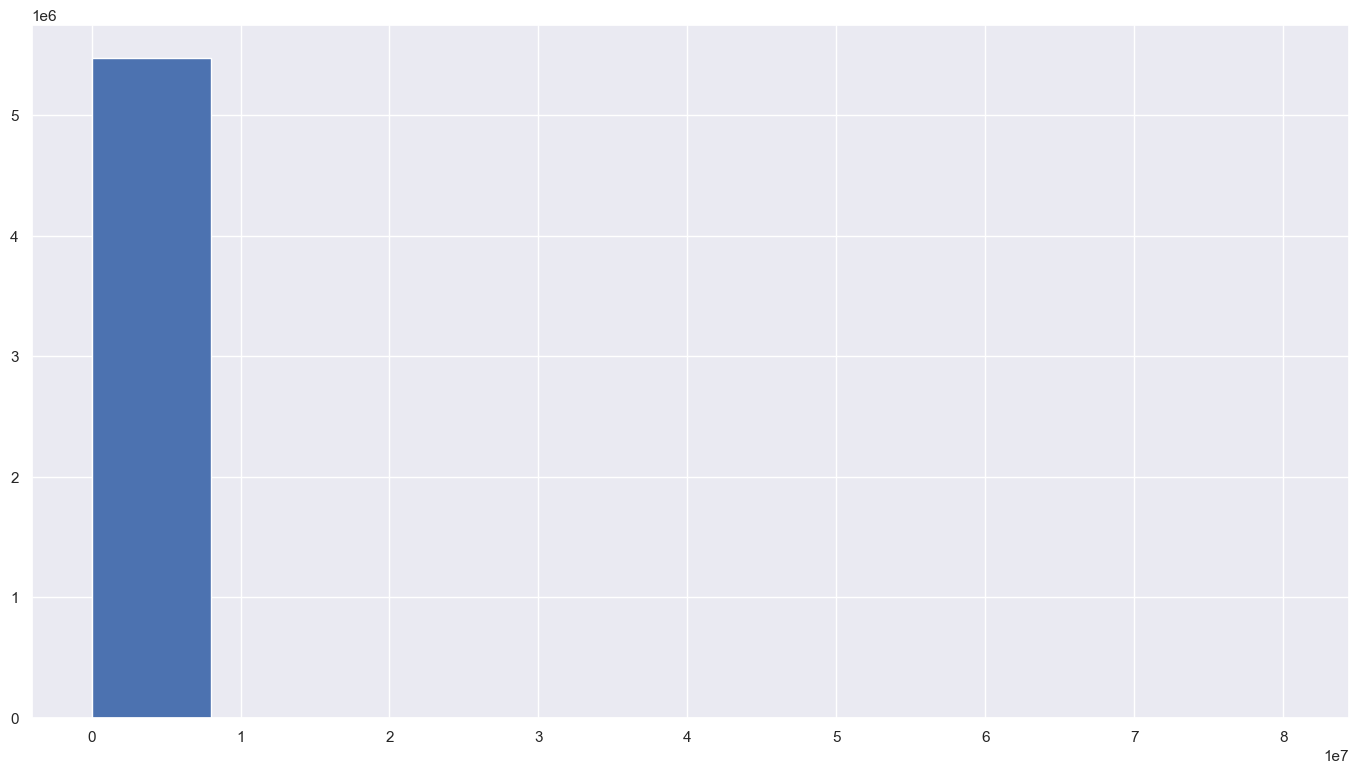

In [98]:
interactions_df['total_dur'].hist()

In [99]:
interactions_df[interactions_df['total_dur'] > 200000].shape

(16042, 5)

<Axes: >

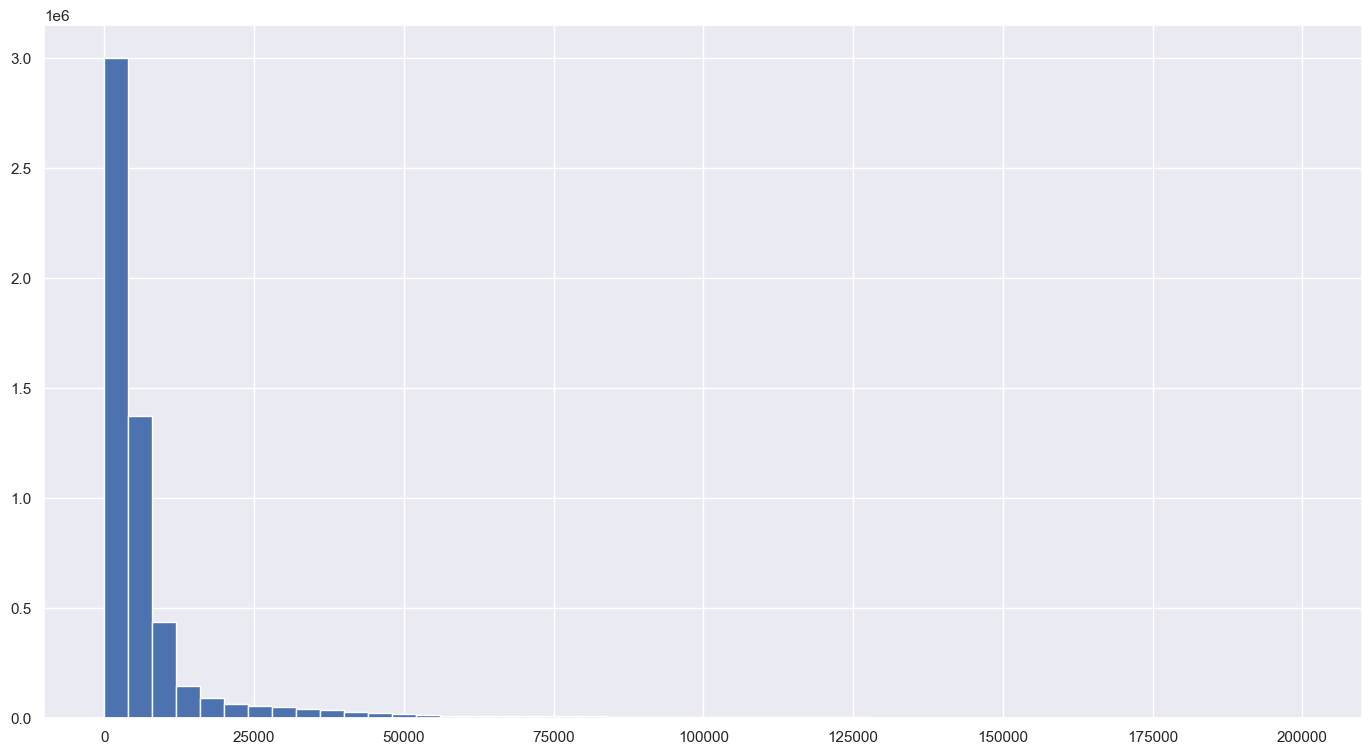

In [100]:
interactions_df[interactions_df['total_dur'] < 200000].total_dur.hist(bins=50)

#### last_watch_dt

In [101]:
interactions_df['last_watch_dt'] = pd.to_datetime(interactions_df['last_watch_dt'])

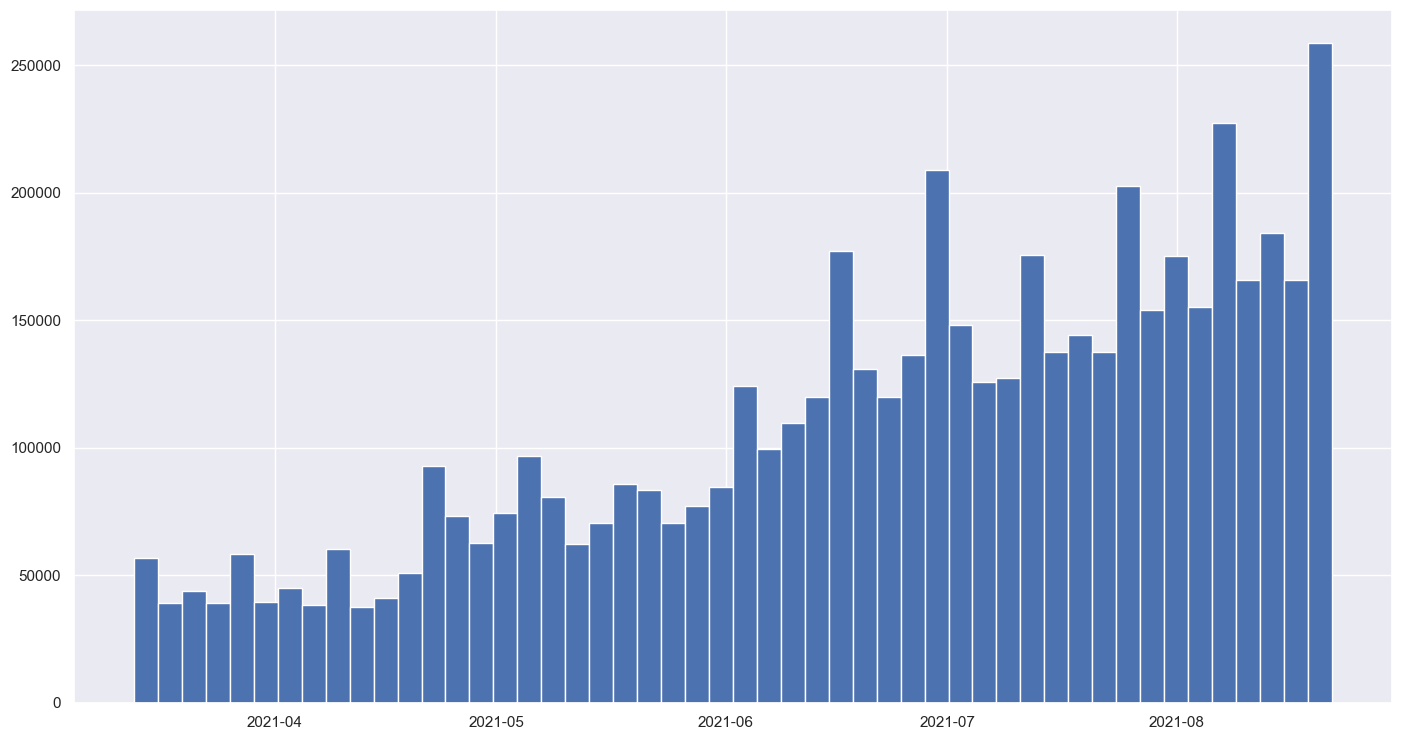

In [102]:
interactions_df['last_watch_dt'].hist(bins=50);

#### Duplicates check

In [103]:
interactions_df.duplicated(subset=['user_id', 'item_id'], keep=False).sum()

np.int64(0)

### Result

In [104]:
interactions_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   last_watch_dt  datetime64[ns]
 3   total_dur      int64         
 4   watched_pct    Int8          
dtypes: Int8(1), datetime64[ns](1), int64(3)
memory usage: 177.6 MB


# Some stats

In [105]:
interaction_users = interactions_df['user_id'].unique()

common_users = len(np.intersect1d(interaction_users, users_df['user_id']))
users_only_in_interaction = len(np.setdiff1d(interaction_users, users_df['user_id']))
users_only_features = len(np.setdiff1d(users_df['user_id'], interaction_users))
total_users = common_users + users_only_in_interaction + users_only_features

print(f'Кол-во пользователей всего                         {total_users}')
print(f'Кол-во пользователей c взаимодействиями и фичами   {common_users} ({common_users / total_users * 100:.2f}%)')
print(f'Кол-во пользователей только c взаимодействиями     {users_only_in_interaction} ({users_only_in_interaction / total_users * 100:.2f}%)')
print(f'Кол-во пользователей только c фичами               {users_only_features} ({users_only_features / total_users * 100:.2f}%)')

Кол-во пользователей всего                         1058088
Кол-во пользователей c взаимодействиями и фичами   744288 (70.34%)
Кол-во пользователей только c взаимодействиями     217891 (20.59%)
Кол-во пользователей только c фичами               95909 (9.06%)


In [106]:
interaction_items = interactions_df['item_id'].unique()

common_items = len(np.intersect1d(interaction_items, items_df['item_id']))
items_only_in_interaction = len(np.setdiff1d(interaction_items, items_df['item_id']))
items_only_features = len(np.setdiff1d(items_df['item_id'], interaction_items))
total_items = common_items + items_only_in_interaction + items_only_features
print(f'Кол-во объектов всего                         {total_items}')
print(f'Кол-во объектов c взаимодействиями и фичами   {common_items} ({common_items / total_items * 100:.2f}%)')
print(f'Кол-во объектов только c взаимодействиями     {items_only_in_interaction} ({items_only_in_interaction / total_items * 100:.2f}%)')
print(f'Кол-во объектов только c фичами               {items_only_features} ({items_only_features / total_items * 100:.2f}%)')

Кол-во объектов всего                         15963
Кол-во объектов c взаимодействиями и фичами   15706 (98.39%)
Кол-во объектов только c взаимодействиями     0 (0.00%)
Кол-во объектов только c фичами               257 (1.61%)


График количества польователей от даты

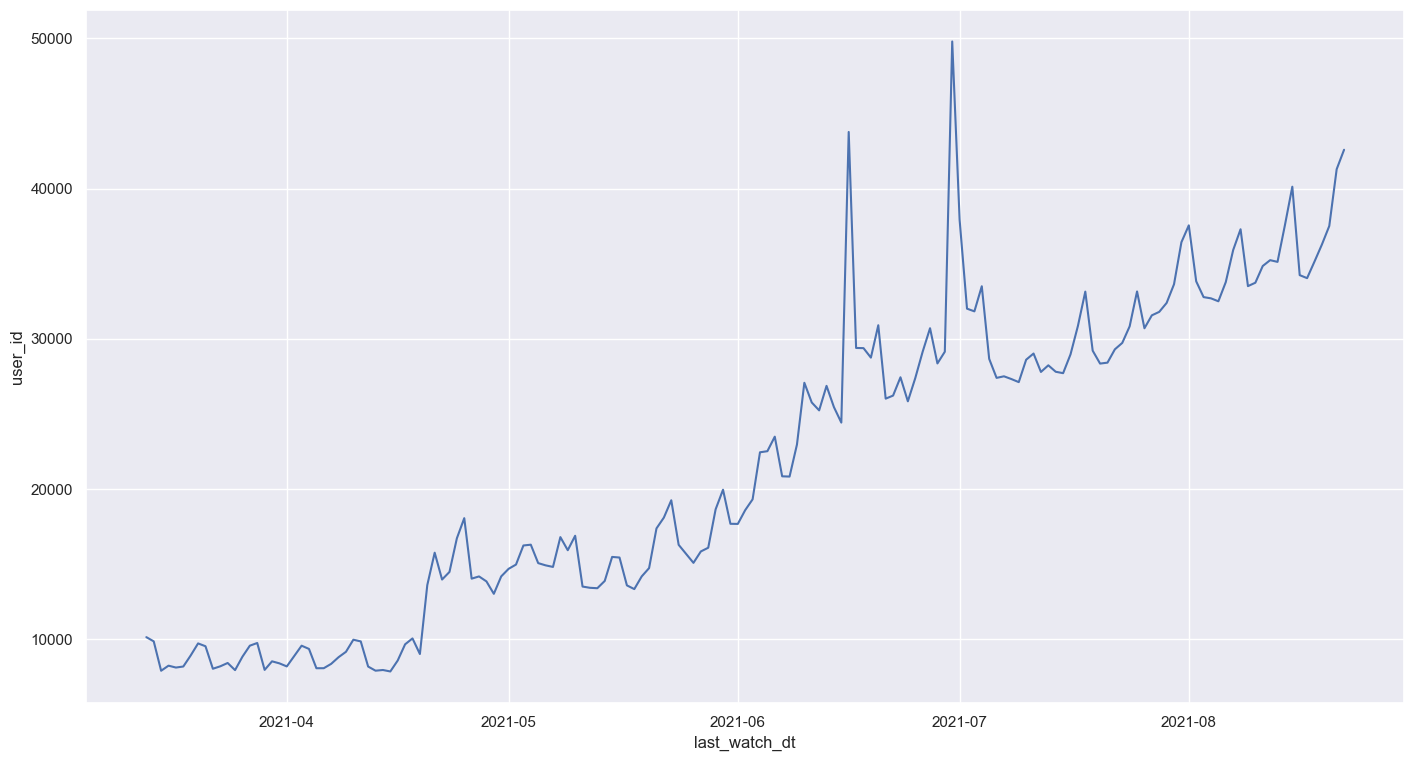

In [107]:
interactions_df_users_count = interactions_df.groupby("last_watch_dt").agg({'user_id': pd.Series.nunique}).reset_index().sort_values('last_watch_dt')
sns.lineplot(data=interactions_df_users_count, x="last_watch_dt", y="user_id");

График количества уникальных пользователей от даты

In [108]:
interactions_df_unique_users_count = []
unique_users = set()

for date in sorted(interactions_df.last_watch_dt.unique()):
    date_unique_users = interactions_df[interactions_df.last_watch_dt == date].user_id.unique()
    interactions_df_unique_users_count.append((date, len(set(date_unique_users) - unique_users)))
    unique_users = unique_users.union(set(date_unique_users))

<Axes: xlabel='date', ylabel='count'>

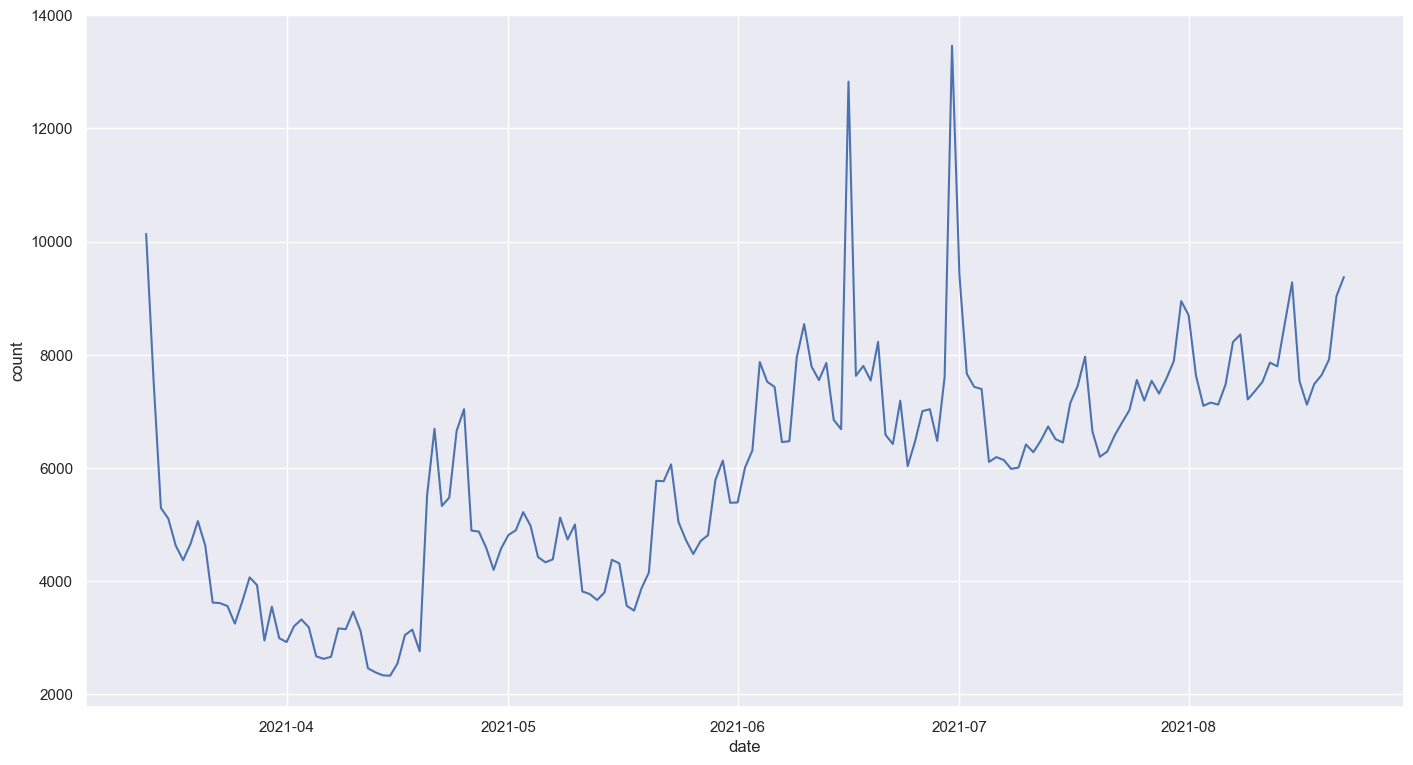

In [109]:
sns.lineplot(data=pd.DataFrame(interactions_df_unique_users_count, columns=['date', 'count']), x="date", y="count") 

Ага, очевидно, что каждый день есть у нас есть новые, "холодные" пользователи
Это необходимо учесть в модели и по хорошему - придумать, что с ними делать

Посмотрим на обьекты

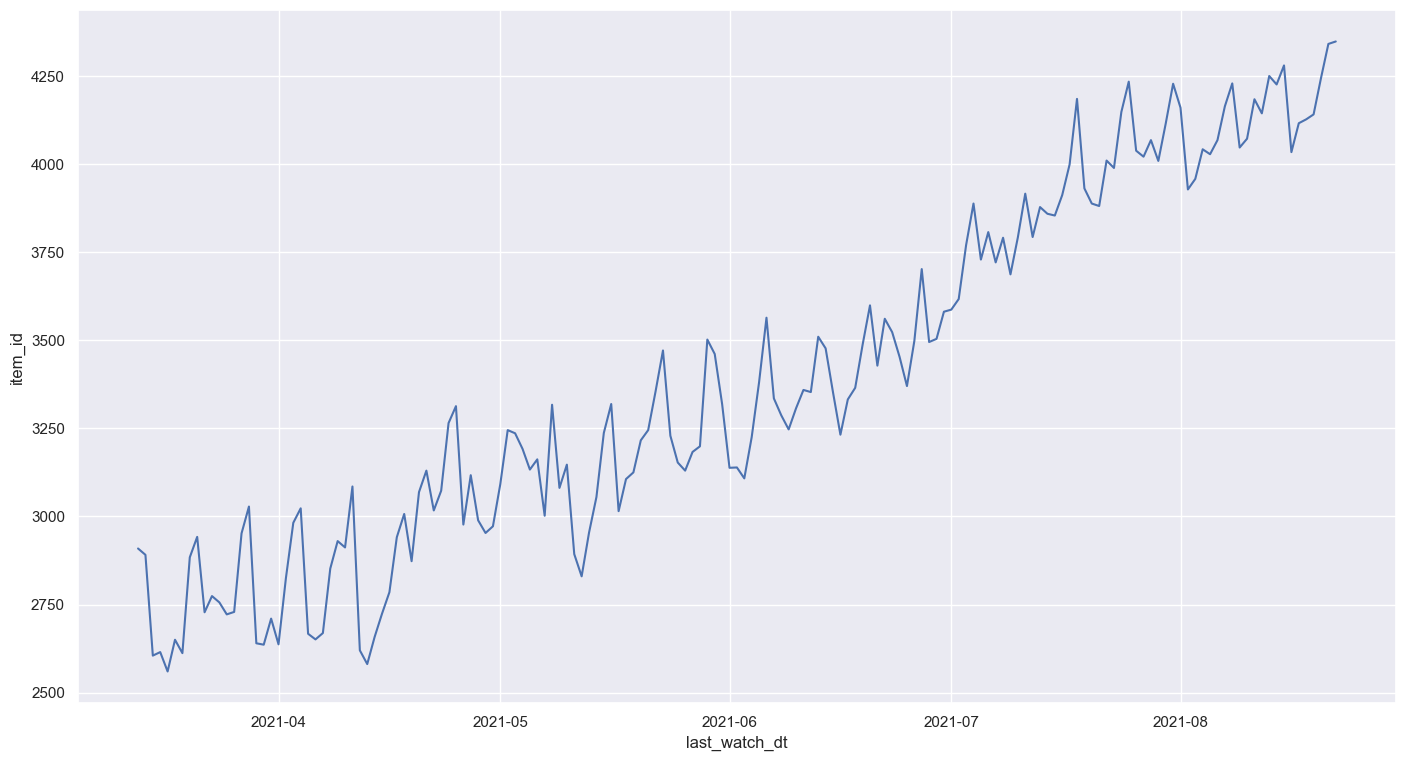

In [110]:
interactions_df_items_count = interactions_df.groupby("last_watch_dt").agg({'item_id': pd.Series.nunique}).reset_index().sort_values('last_watch_dt')
sns.lineplot(data=interactions_df_items_count, x="last_watch_dt", y="item_id");

In [111]:
interactions_df_unique_items_count = []
unique_items = set()

for date in sorted(interactions_df.last_watch_dt.unique()):
    date_unique_items = interactions_df[interactions_df.last_watch_dt == date].item_id.unique()
    interactions_df_unique_items_count.append((date, len(set(date_unique_items) - unique_items)))
    unique_items = unique_items.union(set(date_unique_items))
    
interactions_df_unique_items_count = pd.DataFrame(interactions_df_unique_items_count, columns=['date', 'count'])

<Axes: xlabel='date', ylabel='count'>

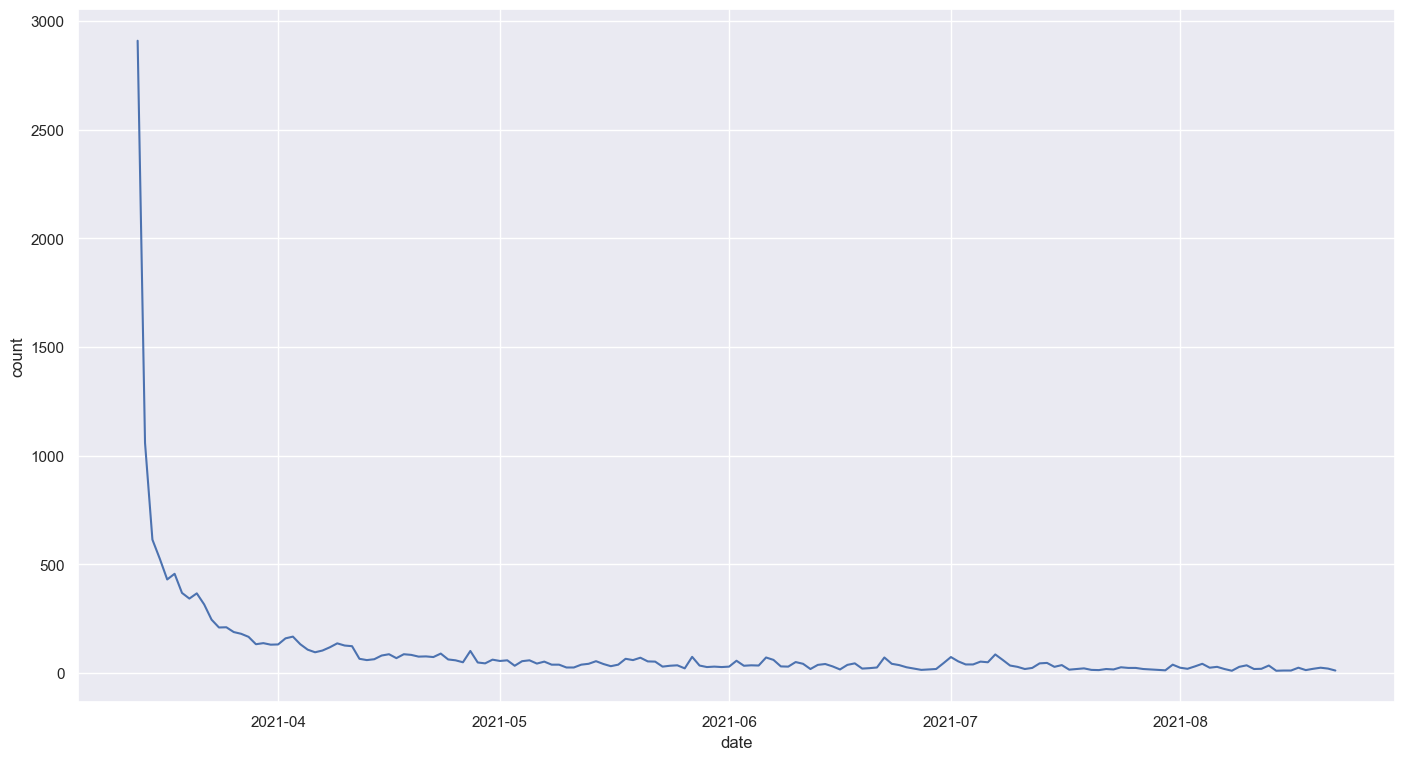

In [112]:
sns.lineplot(data=interactions_df_unique_items_count, x="date", y="count") 

<Axes: xlabel='date', ylabel='count'>

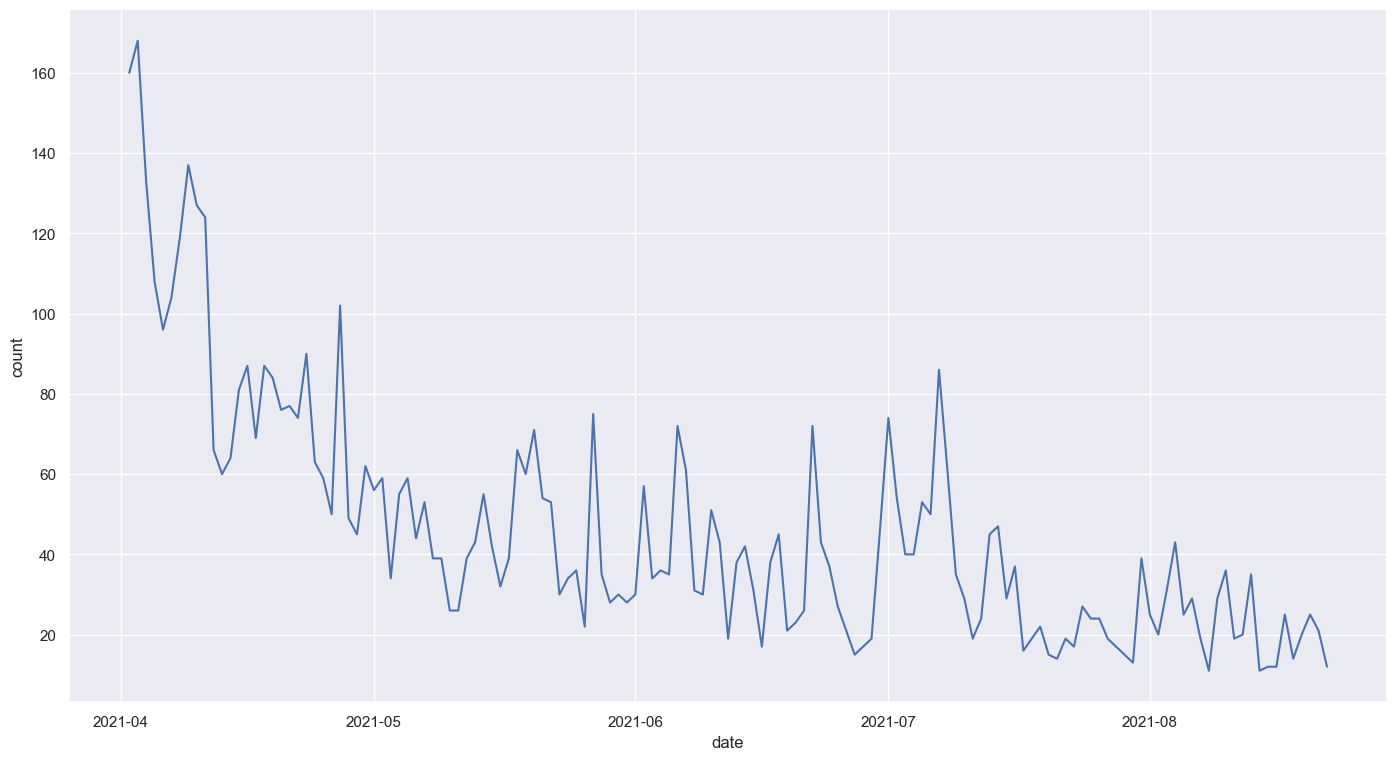

In [113]:
sns.lineplot(data=interactions_df_unique_items_count[interactions_df_unique_items_count.date > '2021-04-01'], x="date", y="count") 

"Холодные" объекты тоже есть, но их явно меньше

# Сохранение

In [114]:
users_df.to_csv(osp.join(DATA_PATH, 'users_processed.csv'), index=False)
items_df.to_csv(osp.join(DATA_PATH, 'items_processed.csv'), index=False)
interactions_df.to_csv(osp.join(DATA_PATH, 'interactions_processed.csv'), index=False)